In [1]:
%run C:/__PYP/__COMMON/ugenejupyterlib/firstcell.ipynb

@
        # 6700k-1080 
        # 2020-07-26 09:54:30.655206 
        # 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)] 
        


In [ ]:
https://plotly.com/python/reference/

In [14]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

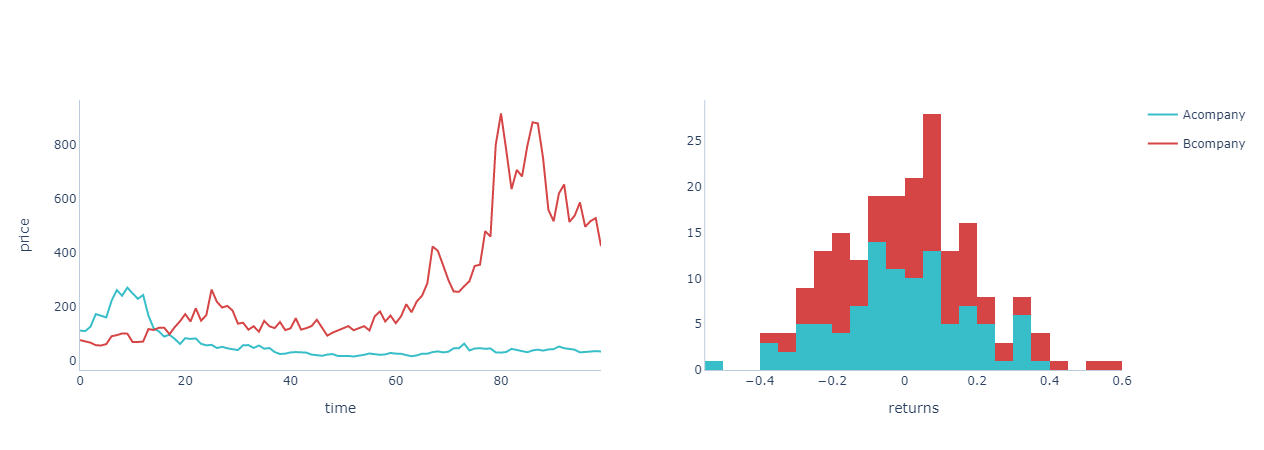

In [44]:
import plotly.io as pio
pio.renderers.default = "jupyterlab"
fig

In [13]:
print(fig)


Figure({
    'data': [{'connectgaps': True,
              'mode': 'lines+markers',
              'name': 'a',
              'type': 'scattergl',
              'x': array([datetime.datetime(2020, 1, 1, 0, 0),
                          datetime.datetime(2020, 1, 1, 1, 0),
                          datetime.datetime(2020, 1, 1, 2, 0),
                          datetime.datetime(2020, 1, 1, 3, 0),
                          datetime.datetime(2020, 1, 1, 4, 0),
                          datetime.datetime(2020, 1, 1, 5, 0),
                          datetime.datetime(2020, 1, 1, 6, 0),
                          datetime.datetime(2020, 1, 1, 6, 10),
                          datetime.datetime(2020, 1, 1, 6, 21),
                          datetime.datetime(2020, 1, 1, 6, 32),
                          datetime.datetime(2020, 1, 1, 6, 43),
                          datetime.datetime(2020, 1, 1, 6, 54),
                          datetime.datetime(2020, 1, 1, 7, 0),
                          datet

In [26]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go

import pandas as pd
import numpy as np
np.random.seed(0)

## setting up the dfs
num_of_rows=10
df0 = pd.DataFrame(
        data=np.random.randint(-200, 500, (num_of_rows, 2)),
        columns=list('ab'),
        index=pd.date_range('2020-01-01', periods=num_of_rows, freq='1h')
        )
# print(df0)


num_of_rows=20
df1 = pd.DataFrame(
        data=np.random.randn(num_of_rows, 1)+10,
        columns=['c'],
        index=pd.date_range('2020-01-01 06:10:00', periods=num_of_rows,  freq='11min'),
        )
df1.iloc[[1, 3, 4, 6], :] = np.nan
# print(df1)

# do we need to merge the dfs to have a common index for ploting?
#     ==> no, as matter of fact, plotting with pd.series is probably better
df_timeseries = pd.merge(left=df0, right=df1, left_index=True, right_index=True, how='outer')
# df_timeseries = df_timeseries.reset_index()
#     ==> if we are adding one subplot at a time anyways, turning index into a column is no longer necessary.
print(df_timeseries)

df_events = pd.DataFrame(
        data=['event foo happens', 'event bar happens', 'event baz happens'],
        columns=['events'],
        index=pd.date_range('2020-01-01 03:00:00', periods=3, freq = '111min'),
        )
# print(df_events)

fig = go.Figure()
ys = [
    'y1', 'y2', 'y3'
]
for i, colname in enumerate(df_timeseries):
    catch=fig.add_trace(go.Scattergl(
        x=df_timeseries.index,
        y=df_timeseries[colname],
        name=colname,
        yaxis = ys[i],
        mode='lines+markers', connectgaps=True, # js is tricter? connectgaps=1 doesn't work
    ))


# Create axis objects
fig = fig.update_layout(
    xaxis=dict(
        domain=[0, 1]
    ),
    yaxis1=dict(
        title="yaxis1 title",
        rangemode='tozero',
    ),
    yaxis2=dict(
        title="yaxis2 title",

        anchor="free",
        overlaying="y",
        side="right",
        position=0.9,
        rangemode='tozero',

    ),
    yaxis3=dict(
        title="yaxis3 title",

        anchor="x",
        overlaying="y",
        side="right",
        position=0.95,
        rangemode='tozero',

    ),
#     yaxis4=dict(
#         title="yaxis4 title",
#         titlefont=dict(
#             color="#9467bd"
#         ),
#         tickfont=dict(
#             color="#9467bd"
#         ),
#         anchor="free",
#         overlaying="y",
#         side="right",
#         position=0.85
#     )
)

layout = go.Layout(
    title="layout adjust",
    plot_bgcolor="#FFF",  # Sets background color to white
    xaxis=dict(
        title="time",
        linecolor="#BCCCDC",  # Sets color of X-axis line
        showgrid=False  # Removes X-axis grid lines
    ),
    yaxis=dict(
        title="price",  
        linecolor="#BCCCDC",  # Sets color of Y-axis line
        showgrid=False,  # Removes Y-axis grid lines    
    ),
    title_text="multiple y-axes example",
    width=1200,
    height=600,
)

# Update layout properties
fig = fig.update_layout(
    layout
)

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)
app.layout = html.Div(
    children=[
        dcc.Graph(
            id='number + text time series plot',
            figure=fig
        ),
    ]
)

# if __name__ == '__main__':
#     app.run_server(debug=0)
fig.show()


                         a      b          c
2020-01-01 00:00:00  484.0  359.0        NaN
2020-01-01 01:00:00  429.0   -8.0        NaN
2020-01-01 02:00:00  159.0 -191.0        NaN
2020-01-01 03:00:00   77.0  399.0        NaN
2020-01-01 04:00:00 -130.0  272.0        NaN
2020-01-01 05:00:00  400.0  196.0        NaN
2020-01-01 06:00:00  114.0  286.0        NaN
2020-01-01 06:10:00    NaN    NaN  10.443863
2020-01-01 06:21:00    NaN    NaN        NaN
2020-01-01 06:32:00    NaN    NaN  11.494079
2020-01-01 06:43:00    NaN    NaN        NaN
2020-01-01 06:54:00    NaN    NaN        NaN
2020-01-01 07:00:00  351.0 -113.0        NaN
2020-01-01 07:05:00    NaN    NaN   9.145904
2020-01-01 07:16:00    NaN    NaN        NaN
2020-01-01 07:27:00    NaN    NaN  10.653619
2020-01-01 07:38:00    NaN    NaN  10.864436
2020-01-01 07:49:00    NaN    NaN   9.257835
2020-01-01 08:00:00  -26.0  400.0  12.269755
2020-01-01 08:11:00    NaN    NaN   8.545634
2020-01-01 08:22:00    NaN    NaN  10.045759
2020-01-01

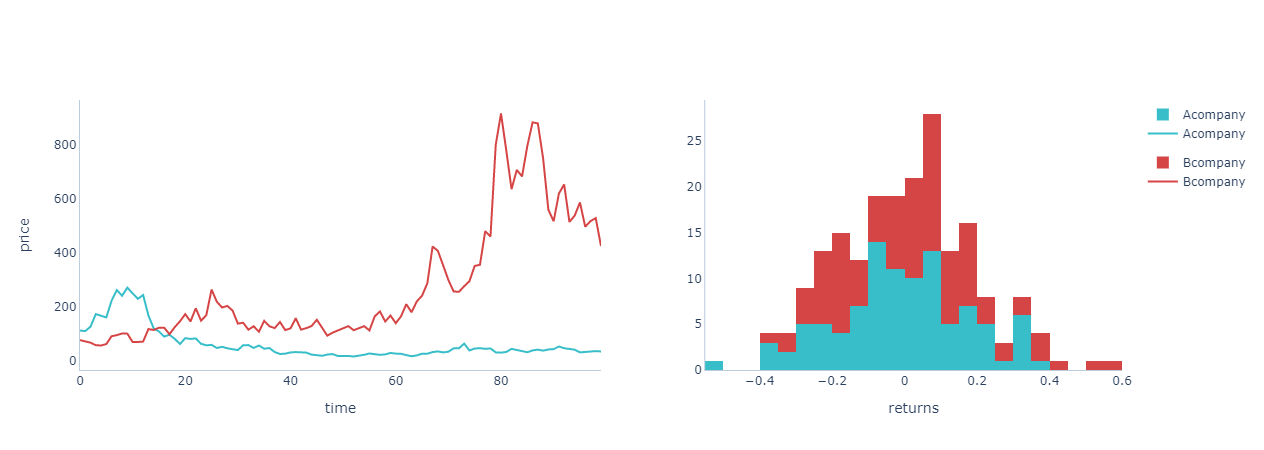

In [48]:
ADD=\
"""
the usage of COLOR_MAPPER to maintain color consistancy
"""
import plotly.graph_objects as go
import numpy as np
np.random.seed(42)

# Simulate data
returns_A = np.random.normal(0.01, 0.2, 100)
returns_B = np.random.normal(0.01, 0.2, 100)
returns = np.append(returns_A, returns_B)

prices_A = 100 * np.exp(returns_A.cumsum())
prices_B = 100 * np.exp(returns_B.cumsum())
prices = np.append(prices_A, prices_B)

companies = ["Acompany"] * 100 + ["Bcompany"] * 100
time = np.append(np.arange(100), np.arange(100))

df = pd.DataFrame({
    "company": companies,
    "time": time,
    "price": prices,
    "returns": returns
})

# for my own code, I will need a style mapper.
COLORS_MAPPER = {
    "Acompany": "#38BEC9",
    "Bcompany": "#D64545"
}

layout = go.Layout(
    plot_bgcolor="#FFFFFF",
    barmode="stack",
    xaxis=dict(
        domain=[0, 0.5],
        title="time",
        linecolor="#BCCCDC",
    ),
    yaxis=dict(
        title="price",
        linecolor="#BCCCDC",
        # range=[-1, 500],
    ),
    xaxis2=dict(
        domain=[0.6, 1],
        title="returns",
        linecolor="#BCCCDC",
        # range=[-1, 500],
    ),
    yaxis2=dict(
        anchor="x2",
        linecolor="#BCCCDC"
    )
)

data = []
for company,color in COLORS_MAPPER.items():
    time = df.loc[df.company == company, "time"]
    price = df.loc[df.company == company, "price"]
    returns = df.loc[df.company == company, "returns"]
    line_chart = go.Scatter(
        x=time,
        y=price,
        marker_color=color,  # Defines specific color for a trace
        legendgroup=company,  # Groups traces belonging to the same group in the legend 
        name=company
    )
    histogram = go.Histogram(
        x=returns,
        marker_color=color,  # Defines specific color for a trace
        legendgroup=company,  # Groups traces belonging to the same group in the legend 
        xaxis="x2", 
        yaxis="y2",
        showlegend=True, # not desired, usually FALSE. so that only "line" is shown in legned
        name=company,
    )
    data.append(line_chart)
    data.append(histogram)

fig = go.Figure(data=data, layout=layout)
fig.show()

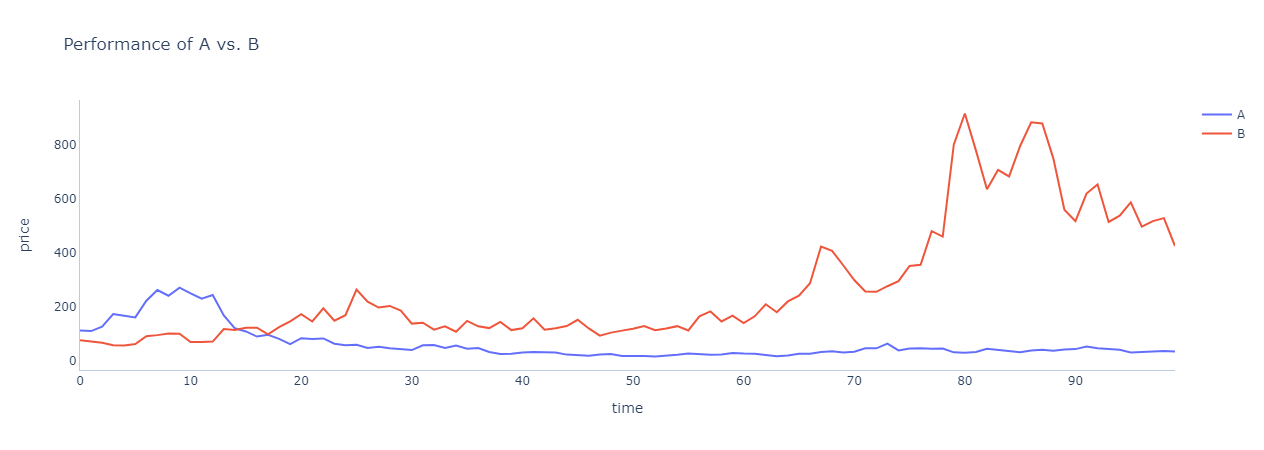

In [55]:
import plotly.graph_objects as go
import numpy as np
np.random.seed(42)

# Simulate data
returns_A = np.random.normal(0.01, 0.2, 100)
returns_B = np.random.normal(0.01, 0.2, 100)
returns = np.append(returns_A, returns_B)

prices_A = 100 * np.exp(returns_A.cumsum())
prices_B = 100 * np.exp(returns_B.cumsum())
prices = np.append(prices_A, prices_B)

companies = ["A"] * 100 + ["B"] * 100
time = np.append(np.arange(100), np.arange(100))

df = pd.DataFrame({
    "company": companies,
    "time": time,
    "price": prices,
    "returns": returns
})

# Build graph
layout = go.Layout(
    title="Performance of A vs. B",    
    plot_bgcolor="#FFFFFF",
    hovermode="x",
    hoverdistance=100, # Distance to show hover label of data point
    spikedistance=1000, # Distance to show spike
    xaxis=dict(
        title="time",
        linecolor="#BCCCDC",
        showspikes=True, # Show spike line for X-axis
        # Format spike
        spikethickness=1,
        spikedash="dot",
        spikecolor="#999999",
        spikemode="across",
    ),
    yaxis=dict(
        title="price",
        linecolor="#BCCCDC"
    )
)

data = []
for company in ["A", "B"]:
    time = df.loc[df.company == company, "time"]
    price = df.loc[df.company == company, "price"]
    returns = df.loc[df.company == company, "returns"]
    line_chart = go.Scatter(
        x=time,
        y=price,
        name=company
    )
    data.append(line_chart)

fig = go.Figure(data=data, layout=layout)
fig.show()

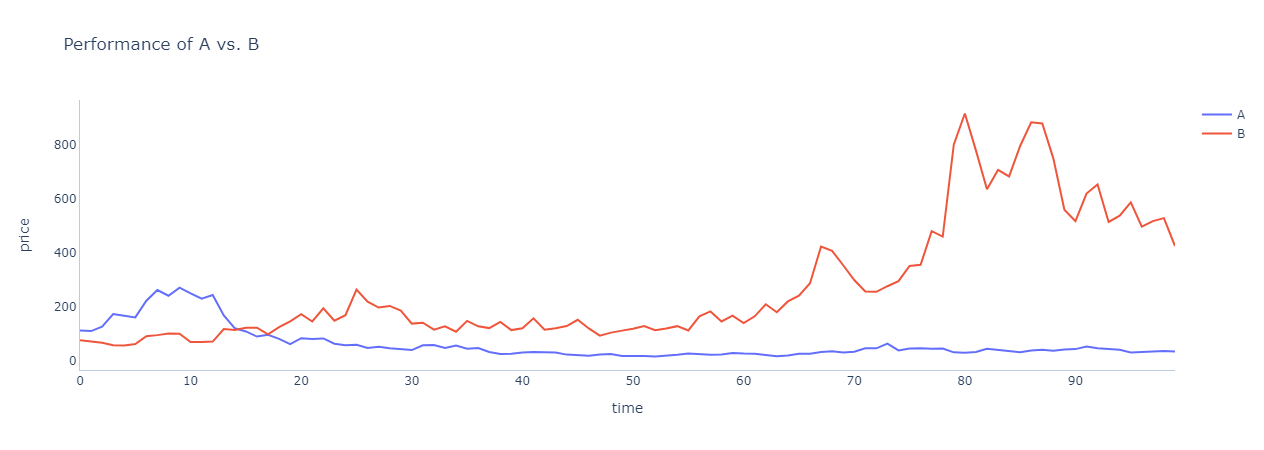

In [56]:
import plotly.graph_objects as go
import numpy as np
np.random.seed(42)

# Simulate data
returns_A = np.random.normal(0.01, 0.2, 100)
returns_B = np.random.normal(0.01, 0.2, 100)
returns = np.append(returns_A, returns_B)

prices_A = 100 * np.exp(returns_A.cumsum())
prices_B = 100 * np.exp(returns_B.cumsum())
prices = np.append(prices_A, prices_B)

companies = ["A"] * 100 + ["B"] * 100
time = np.append(np.arange(100), np.arange(100))

df = pd.DataFrame({
    "company": companies,
    "time": time,
    "price": prices,
    "returns": returns
})

# Build graph
layout = go.Layout(
    title="Performance of A vs. B",    
    plot_bgcolor="#FFFFFF",
    legend=dict(
        # Adjust click behavior
        itemclick="toggleothers",
        itemdoubleclick="toggle",
    ),
    xaxis=dict(
        title="time",
        linecolor="#BCCCDC",
    ),
    yaxis=dict(
        title="price",
        linecolor="#BCCCDC"
    )
)

data = []
for company in ["A", "B"]:
    time = df.loc[df.company == company, "time"]
    price = df.loc[df.company == company, "price"]
    returns = df.loc[df.company == company, "returns"]
    line_chart = go.Scatter(
        x=time,
        y=price,
        name=company
    )
    data.append(line_chart)

fig = go.Figure(data=data, layout=layout)
fig.show(config={"displayModeBar": False, "showTips": False}) # Remove floating menu and unnecesary dialog box